# Exploratory Data Analysis on Vechicle Insurance Dataset
EDA consists of some steps such as checking raw dataframe, handling missing values, outliers, categorical encoding, correlation between
the columns, andfeature engineering.
Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#% matplotlib inline #allows us to view our graphs in jupyter notebook itself

Setting function to display all the rows and columns of the dataset

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Reading the train and test dataset

In [3]:
#loading dataset by using pandas function pd.read_csv
#train dataset
train_data=pd.read_csv('C:\\Users\\rakhi\\OneDrive\\Desktop\\vehicle insurance dataset\\data\\train.csv')

#test dataset
test_data=pd.read_csv('C:\\Users\\rakhi\\OneDrive\\Desktop\\vehicle insurance dataset\\data\\test.csv')

In [4]:
#checking the dataframe for training data, some basic analysis
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Feature Descriptions



.id: Unique ID for the customer




.Gender: Gender of the customer


.Age:Age of  the customer

.Driving_License: 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code: Unique code for the region of the customer


Previously_Insured: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have the Vechile Insurance

Vehicle_Age: Age of the Vehicle

Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium: The amount customer needs to pay as premium in the year

PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In
Person, etc.


Vintage: Number of Days, Customer has been associated with the company

Response: 1 : Customer is interested, 0 : Customer is not interested

In [5]:
train_data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


Data Frame Summary

In [6]:
#some statistics of dataset
train_data.describe() #gives information of non-null values

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
train_data.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


from observations:
it has 381109 rows/data points with 12 columns/features.

3 categorical variables and 9 numeric variables

In [9]:
#Checking for Categorical Data in train data
train_data.select_dtypes(exclude=['int64','float64']).columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [10]:
#checking categorical and numerical variables using loop
# categorical var
for i in train_data.columns:
    if train_data[i].dtype == 'O':
        print('categorical var:',i)

#numerical variables
for j in train_data.columns:
    if train_data[j].dtype != 'O':
        print('numerical var:',j)

categorical var: Gender
categorical var: Vehicle_Age
categorical var: Vehicle_Damage
numerical var: id
numerical var: Age
numerical var: Driving_License
numerical var: Region_Code
numerical var: Previously_Insured
numerical var: Annual_Premium
numerical var: Policy_Sales_Channel
numerical var: Vintage
numerical var: Response


Working on the train data

Checking the shape of dataset

In [11]:
print('shape of our datset in rows and columns: ',train_data.shape)

shape of our datset in rows and columns:  (381109, 12)


Checking for duplicate values

In [12]:
train_data.duplicated().sum()

0

Checking for missing values

In [13]:
#checking the null values
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Dividing the data into categorical and numerical data

In [14]:
df_cat=train_data[['Gender', 'Vehicle_Age', 'Vehicle_Damage']]
df_num=train_data[['id', 'Age', 'Driving_License', 'Region_Code',
'Previously_Insured', 'Annual_Premium',
'Policy_Sales_Channel', 'Vintage', 'Response']]

Categorical data analysis

In [15]:
#categorical var value counts:frequency table
df_cat['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [16]:
df_cat['Gender'].describe()

count     381109
unique         2
top         Male
freq      206089
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

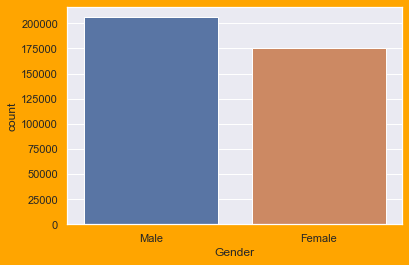

In [17]:
sns.set(rc={'figure.facecolor':'orange'})
sns.countplot(df_cat['Gender'])

In [18]:
df_cat['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [19]:
df_cat.Vehicle_Damage.describe()

count     381109
unique         2
top          Yes
freq      192413
Name: Vehicle_Damage, dtype: object

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

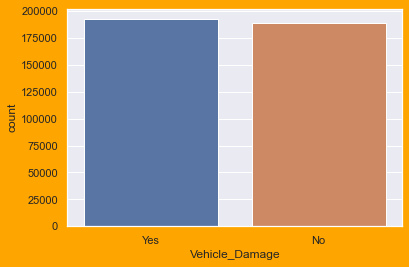

In [20]:
sns.countplot('Vehicle_Damage',data=df_cat)

In [21]:
df_cat['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [22]:
df_cat.Vehicle_Age.nunique()

3

In [23]:
df_cat.Vehicle_Age.describe()

count       381109
unique           3
top       1-2 Year
freq        200316
Name: Vehicle_Age, dtype: object

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

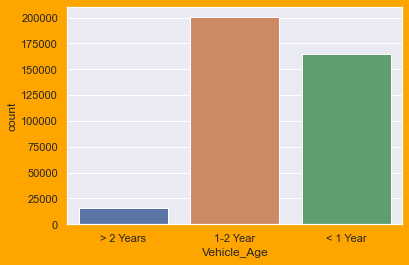

In [24]:
sns.countplot('Vehicle_Age',data=df_cat)

In [25]:
print(df_num.Age.min())
print(df_num.Age.max())

20
85


In [26]:
df_num.Age.describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

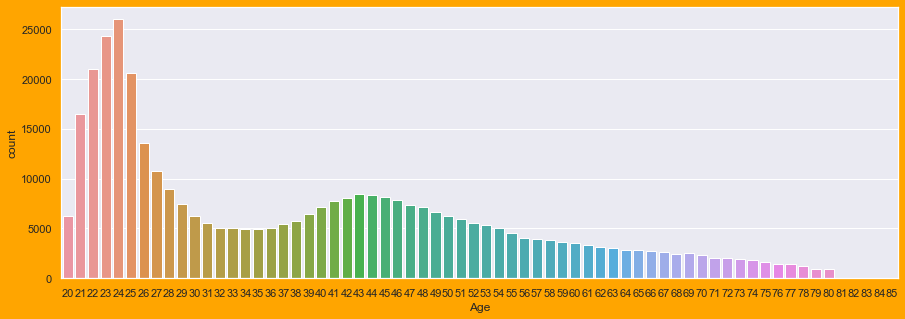

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(df_num.Age)

In [28]:
#checking the target variable
train_data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [29]:
df_num.Response.describe()

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64

<AxesSubplot:xlabel='Response', ylabel='Density'>

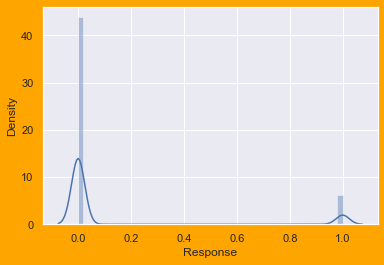

In [30]:
#Checking the skewness of the target variable
#df_num['Response'].hist(bins=50)
sns.distplot(df_num['Response'])

In [31]:
df_num['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [32]:
df_num.Previously_Insured.describe()

count    381109.000000
mean          0.458210
std           0.498251
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Previously_Insured, dtype: float64

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

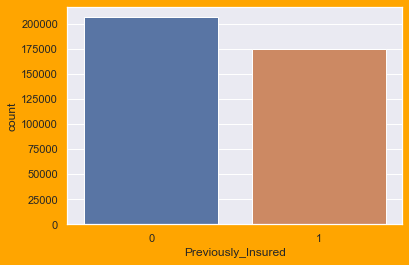

In [33]:
sns.countplot('Previously_Insured',data=df_num)
#sns.displot(df_num['Previously_Insured'])

<AxesSubplot:xlabel='Age', ylabel='Response'>

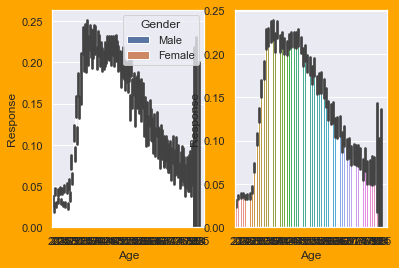

In [34]:
plt.subplot(1,2,1)
sns.barplot(x=df_num['Age'],y=df_num['Response'],hue=df_cat['Gender'])
plt.subplot(1,2,2)
sns.barplot(x=df_num['Age'],y=df_num['Response'])

In [35]:
pd.crosstab(index=[df_num['Age']], columns='Median_Premium', values=df_num['Annual_Premium'],aggfunc='median')

col_0,Median_Premium
Age,
20,29426.0
21,30859.0
22,30851.0
23,30763.5
24,31042.0
25,30734.5
26,30126.0
27,29878.0
28,29783.0


<AxesSubplot:>

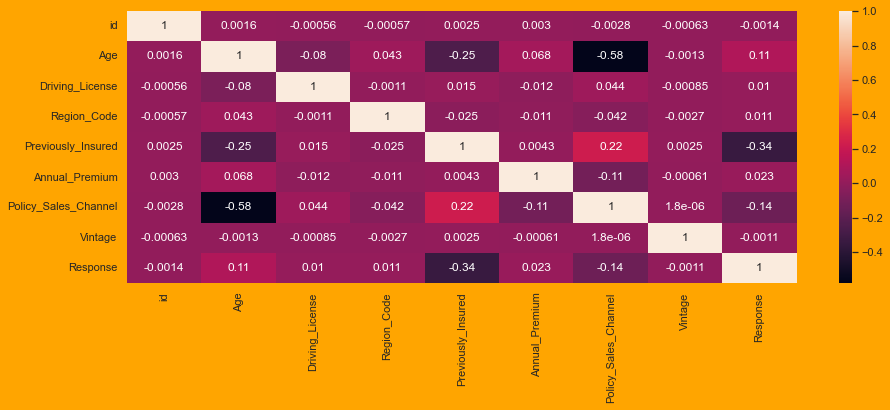

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(train_data.corr(), annot=True)

AxesSubplot(0.125,0.125;0.775x0.755)


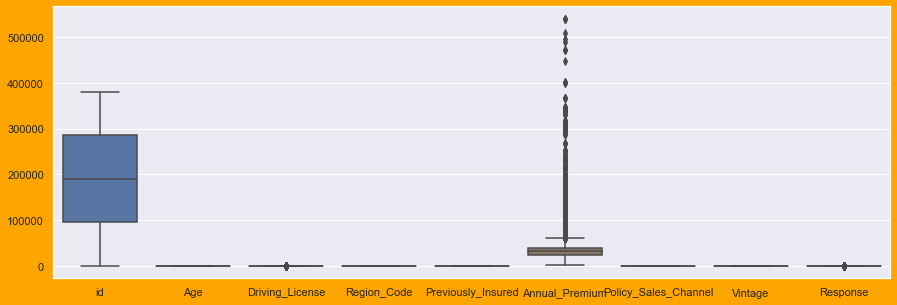

In [37]:
#sns.boxplot('Annual_Premium', data=df_num)
plt.figure(figsize=(15,5))
print(sns.boxplot(data=df_num))

In [38]:
#removing outliers
q1 = train_data['Annual_Premium'].quantile(0.25)
q3 = train_data['Annual_Premium'].quantile(0.75)
iqr = q3 - q1
upper_fence = q3+(1.5*iqr)
lower_fence = q1-(1.5*iqr)
print(iqr, upper_fence, lower_fence)

14995.0 61892.5 1912.5


In [39]:
#checking the number of outliers
print('number of outliers above the UF',train_data[train_data['Annual_Premium']>upper_fence].count()['Annual_Premium'])
print('number of outliers below the LF',train_data[train_data['Annual_Premium']<lower_fence].count()['Annual_Premium'])
      
#outlier removal from the Km_driven variable
df_encoding = train_data[train_data['Annual_Premium']<upper_fence]

number of outliers above the UF 10320
number of outliers below the LF 0


# Encoding

In [40]:
df_encoding=pd.get_dummies(df_encoding,drop_first=True)
df_encoding=df_encoding.drop(columns=['id'],axis=1)
df_encoding.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


<AxesSubplot:>

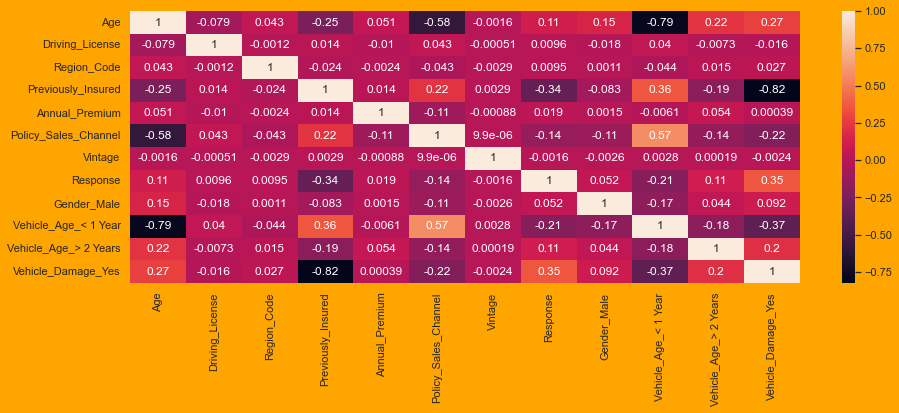

In [41]:
plt.figure(figsize=(15,5))
sns.heatmap(df_encoding.corr(),annot=True)

Saving the cleaned analysed data in pickle file

In [43]:
import pickle
with open('C:\\Users\\rakhi\\OneDrive\\Desktop\\vehicle insurance dataset\\models\\ExplorataryDataAnalysis.pkl','wb')as f:
    pickle.dump(df_encoding, f)